#TMD SIDIS

##Specify path to TMD libs

In [2]:
root='../../'

##load libraries

In [3]:
import sys,os
sys.path.insert(1,root)
import pylab as py
import numpy as np
%matplotlib inline  
from TMDPDF import TMDPDF
from StrongCoupling import StrongCoupling
from tools import ProgressBar,tex
from DrellYan import DrellYan
from CollinearPDF import Cteq6PDF,ToyPDF
from FF.FF import FragFuncs
from SIDIS_beta import SIDIS_L,SIDIS_FO,SIDIS_ASY

##initialize collinear PDF 

In [4]:
CPDF=Cteq6PDF(root)
CFF=FragFuncs(root+'FF/tables/PILO.TAB')

In [5]:
sidisL=SIDIS_L(CPDF,CFF)
sidisFO=SIDIS_FO(CPDF,CFF)
sidisASY=SIDIS_ASY(CPDF,CFF)


## Setup Non-Perturbative parts

In [6]:
def PDFNP(x,zetaF,bT2):
    arg = -0.25*(0.19*np.log(zetaF/(1.0)))*bT2
    arg+= -1.0*((0.013*(1-x)**3)/x)*bT2
    return np.exp(arg)

def FFNP(z,zetaD,bT2):
    arg = -0.25*(0.19*np.log(zetaD/(1.0)))*bT2
    arg+= -(0.1)*bT2                                           
    return np.exp(arg)

sidisL.TPDF.D['NP model'] = PDFNP
sidisL.TFF.D['NP model'] = FFNP
sidisL.set_bT2max(np.sqrt(1.5))

##Setup Kinematics

In [7]:
Q2=5.7**2
z=0.8
x=0.0049
s=300.0
y=(Q2)/(x*s)
charge=0
qTs=np.linspace(0.1,10.,40)

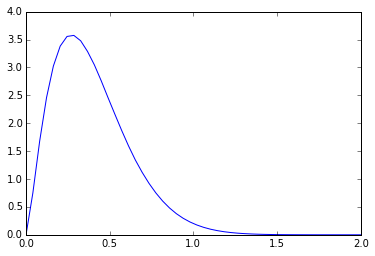

In [8]:
BT=np.linspace(1e-4,2)
FD=[sidisL.get_FD_bT_space(x,y,z,Q2,Q2,Q2,Q2,bT*bT,charge) for bT in BT]
py.plot(BT,FD)

## Compute L part

In [10]:
sidisL.setup_hankel(N=70,h=1e-3)
bar=ProgressBar(qTs.size,'computing with FFT ')
L=[]
cnt=0
for qT in qTs: 
    L.append(sidisL.get_L(x,y,z,Q2,Q2,Q2,Q2,qT,charge)) 
    bar.animate(cnt+1)
    cnt+=1

[**************************100%********]  computing with FFT   40 of 40 complete


## Compute FO & ASY

In [11]:
bar=ProgressBar(qTs.size,'computing FO ')
FO=[]
cnt=0
for qT in qTs: 
    FO.append(sidisFO.get_FO(x,y,z,Q2,qT**2,Q2,Q2,charge)) 
    bar.animate(cnt+1)
    cnt+=1
FO=np.array(FO)

[***********************100%***********]  computing FO   40 of 40 complete


In [12]:
bar=ProgressBar(qTs.size,'computing ASY ')
ASY=[]
cnt=0
for qT in qTs: 
    ASY.append(sidisASY.get_ASY(x,y,z,Q2,qT**2,Q2,Q2,charge)) 
    bar.animate(cnt+1)
    cnt+=1
ASY=np.array(ASY)

[************************100%**********]  computing ASY   40 of 40 complete


[]

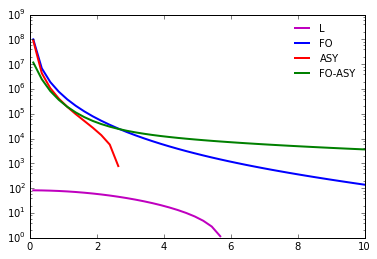

In [13]:
ax=py.subplot(111)
ax.plot(qTs,L,'m-',lw=2,label='L')
ax.plot(qTs,FO,'b-',lw=2,label='FO')
ax.plot(qTs,ASY,'r-',lw=2,label='ASY')
ax.plot(qTs,FO-ASY,'g-',lw=2,label='FO-ASY')
#ax.set_ylim(-2,100)
#ax.set_xlabel(tex('q_T(GeV)'),size=20)
#ax.set_ylabel(tex('d\sig/'),size=20)
ax.legend(frameon=0,fontsize=10)
#ax.axhline(y=0,c='k',alpha=0.5)
ax.semilogy()